In [44]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [46]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [47]:
yaroslavtweets = get_all_tweets("@yarotrof")

...400 tweets downloaded so far
...599 tweets downloaded so far
...799 tweets downloaded so far
...999 tweets downloaded so far
...1198 tweets downloaded so far
...1397 tweets downloaded so far
...1596 tweets downloaded so far
...1793 tweets downloaded so far
...1993 tweets downloaded so far
...2193 tweets downloaded so far
...2393 tweets downloaded so far
...2589 tweets downloaded so far
...2789 tweets downloaded so far
...2988 tweets downloaded so far
...3187 tweets downloaded so far
...3237 tweets downloaded so far
...3237 tweets downloaded so far


In [48]:
#overview of yaroslav tweets
yaroslavtweets .head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 10:50:54+00:00,Yaroslav Trofimov,22395,Chief Foreign-Affairs Correspondent of The Wall Street Journal. Author of Siege of Mecca. Endorsing nothing. Email me yarotrof at gmail. https://t.co/izxPVsjmVa,[],"[{'screen_name': 'christogrozev', 'name': 'Christo Grozev', 'id': 144611647, 'id_str': '144611647', 'indices': [3, 17]}]",0,it,3503,86743,270,False,"RT @christogrozev: Lavrov, in an interview to Berlusconi's tv channel Mediaset: https://t.co/YN7anTXVcH",Home is where my suitcase is
1,2022-05-02 09:08:32+00:00,Yaroslav Trofimov,22395,Chief Foreign-Affairs Correspondent of The Wall Street Journal. Author of Siege of Mecca. Endorsing nothing. Email me yarotrof at gmail. https://t.co/izxPVsjmVa,[],[],55,en,3503,86743,18,False,Our latest on Ukraine’s claimed sinking of two Russian warships. https://t.co/3YXHO0zZQG,Home is where my suitcase is
2,2022-05-02 08:45:25+00:00,Yaroslav Trofimov,22395,Chief Foreign-Affairs Correspondent of The Wall Street Journal. Author of Siege of Mecca. Endorsing nothing. Email me yarotrof at gmail. https://t.co/izxPVsjmVa,[],"[{'screen_name': 'galt_the', 'name': 'Alex P', 'id': 1020602380096696320, 'id_str': '1020602380096696320', 'indices': [0, 9]}]",1,en,3503,86743,0,False,@galt_the Patrol boats with a 100-mile range are definitely warships.,Home is where my suitcase is
3,2022-05-02 08:30:59+00:00,Yaroslav Trofimov,22395,Chief Foreign-Affairs Correspondent of The Wall Street Journal. Author of Siege of Mecca. Endorsing nothing. Email me yarotrof at gmail. https://t.co/izxPVsjmVa,[],"[{'screen_name': 'Pandamokneeum', 'name': 'Aki', 'id': 1496583888331628545, 'id_str': '1496583888331628545', 'indices': [0, 14]}, {'screen_name': 'truecounter', 'name': 'Truecounter', 'id': 400834403, 'id_str': '400834403', 'indices': [15, 27]}, {'screen_name': 'galt_the', 'name': 'Alex P', 'id': 1020602380096696320, 'id_str': '1020602380096696320', 'indices': [28, 37]}]",1,en,3503,86743,0,False,@Pandamokneeum @truecounter @galt_the They are 16.9 meters long,Home is where my suitcase is
4,2022-05-02 08:12:11+00:00,Yaroslav Trofimov,22395,Chief Foreign-Affairs Correspondent of The Wall Street Journal. Author of Siege of Mecca. Endorsing nothing. Email me yarotrof at gmail. https://t.co/izxPVsjmVa,[],[],849,en,3503,86743,189,False,Each of those warships can carry 20 Marines in addition to 3 crew. If they were heading to relieve Russia’s Snake I… https://t.co/cwsoRFxBwW,Home is where my suitcase is


In [49]:
yaroslavtweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237
unique,3237,1,1,1,135,1360,408,25,1,1,854,1,3237,1
top,2021-10-20 08:14:09+00:00,Yaroslav Trofimov,22395,Chief Foreign-Affairs Correspondent of The Wall Street Journal. Author of Siege of Mecca. Endorsing nothing. Email me yarotrof at gmail. https://t.co/izxPVsjmVa,[],[],0,en,3503,86743,0,False,@margheritamvs Aug. 16,Home is where my suitcase is
freq,1,3237,3237,3237,3100,1105,1598,3076,3237,3237,479,3237,1,3237


In [50]:
yaroslavtweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3237 non-null   object
 1   name             3237 non-null   object
 2   totaltweets      3237 non-null   object
 3   description      3237 non-null   object
 4   hashtags         3237 non-null   object
 5   user_mentions    3237 non-null   object
 6   favorite_count   3237 non-null   object
 7   lang             3237 non-null   object
 8   following        3237 non-null   object
 9   followers_count  3237 non-null   object
 10  retweet_count    3237 non-null   object
 11  retweeted        3237 non-null   object
 12  text             3237 non-null   object
 13  location         3237 non-null   object
dtypes: object(14)
memory usage: 354.2+ KB


In [51]:
#measuring hashtahs
yaroslavtweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],3100
"[{'text': 'BREAKING', 'indices': [21, 30]}]",2
"[{'text': 'TheJournal', 'indices': [27, 38]}]",2
"[{'text': 'Belarus', 'indices': [20, 28]}]",2


In [52]:
#display the most user mentions
yaroslavtweets['user_mentions'].value_counts().loc[lambda x : x>20].to_frame()

,user_mentions
[],1105
"[{'screen_name': 'WSJ', 'name': 'The Wall Street Journal', 'id': 3108351, 'id_str': '3108351', 'indices': [3, 7]}]",37
"[{'screen_name': 'JChengWSJ', 'name': 'Jonathan Cheng', 'id': 382788364, 'id_str': '382788364', 'indices': [3, 13]}]",32
"[{'screen_name': 'MacaesBruno', 'name': 'Bruno Maçães', 'id': 1480749782, 'id_str': '1480749782', 'indices': [0, 12]}]",26


In [80]:
#which tweet got the most likes
print(yaroslavtweets ['favorite_count'].max())
yaroslavtweets.loc[yaroslavtweets ['favorite_count'] == yaroslavtweets ['favorite_count'].max()]['text']

104221


3173    Trump visits the coronavirus swab production line in Maine, without a mask, and the manufacturer says it will now h… https://t.co/U4TvbgtKjy
Name: text, dtype: object

In [81]:
#which tweet got the most retweets
print(yaroslavtweets ['retweet_count'].max())
yaroslavtweets.loc[yaroslavtweets ['retweet_count'] == yaroslavtweets ['retweet_count'].max()]['text']

208284


2861    RT @borzou: Stunning video shows explosions just minutes ago at Beirut port https://t.co/ZjltF0VcTr
Name: text, dtype: object

In [55]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [56]:
yaroslavtweets   = get_sentiment_scores(yaroslavtweets  ,'text')
tweet_sentiment = yaroslavtweets  [['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [57]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,"RT @christogrozev: Lavrov, in an interview to Berlusconi's tv channel Mediaset: https://t.co/YN7anTXVcH",0.000,0.000
1,Our latest on Ukraine’s claimed sinking of two Russian warships. https://t.co/3YXHO0zZQG,0.000,0.130
2,@galt_the Patrol boats with a 100-mile range are definitely warships.,0.241,0.134
3,@Pandamokneeum @truecounter @galt_the They are 16.9 meters long,0.000,0.000
4,Each of those warships can carry 20 Marines in addition to 3 crew. If they were heading to relieve Russia’s Snake I… https://t.co/cwsoRFxBwW,0.104,0.062


In [58]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 1.0, Tweet: Magnificently brilliant.
Score: 0.855, Tweet: @Tmgneff Good luck
Score: 0.831, Tweet: God bless. https://t.co/16bG4quWCj
Score: 0.792, Tweet: Brilliant https://t.co/yZDeXAFV78
Score: 0.792, Tweet: Brilliant https://t.co/oxVOIUEdje
Score: 0.787, Tweet: @vmsalama Congrats!
Score: 0.787, Tweet: Congrats ! https://t.co/bs9aFkjhJu
Score: 0.78, Tweet: @peterfrankopan Nice! Happy birthday!
Score: 0.777, Tweet: @AnasMallick Enjoy!
Score: 0.773, Tweet: Congrats https://t.co/P1H3qXc0aU


In [59]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.787, Tweet: Horrifying. https://t.co/B1k9QfNa7G
Score: 0.73, Tweet: Insane https://t.co/3QYzjkbeTg
Score: 0.651, Tweet: Absolutely vile. Sadly, not uncommon. https://t.co/yObWd0NEAJ
Score: 0.63, Tweet: @NikaMelkozerova Stinking scoundrels
Score: 0.615, Tweet: Scary stuff https://t.co/WStwU1WRzG
Score: 0.608, Tweet: Terrible news.  https://t.co/FIkq2k4bPr
Score: 0.538, Tweet: Belarusians kneel as a killed protester’s funeral starts. https://t.co/lnEIjbxcvb
Score: 0.538, Tweet: Correct. My bad. https://t.co/Nxsevfaw9g
Score: 0.524, Tweet: @IgorJanke No ba
Score: 0.508, Tweet: @749Joanie Have some shame.


In [60]:
yaroslavtweets['retweet_count']= yaroslavtweets  ['retweet_count'].astype('int64')
yaroslavtweets['favorite_count']= yaroslavtweets  ['favorite_count'].astype('int64')

In [61]:
features= yaroslavtweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.156471,0.000339,0.003371
favorite_count,0.156471,1.000000,-0.009956,-0.009488
text Positive Sentiment Score,0.000339,-0.009956,1.000000,-0.140891
text Negative Sentiment Score,0.003371,-0.009488,-0.140891,1.000000


<AxesSubplot:>

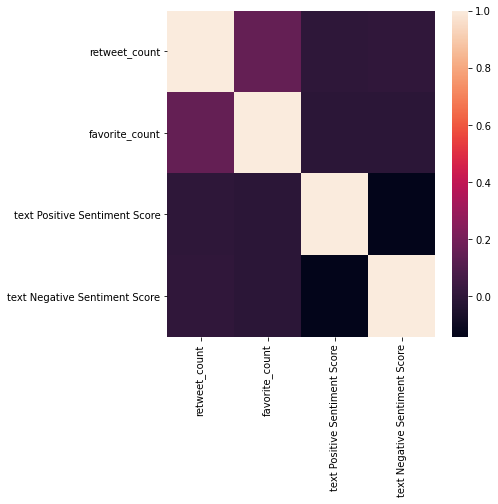

In [62]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [63]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [64]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [65]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-65-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-2ade89c

In [66]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-66-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                    : lavrov, interview berlusconis tv channel mediaset:
1                               latest ’s claimed sinking two n warships.
2                    _the patrol boat 100-mile range definitely warships.
3                                                    _the 16.9 meter long
4    warship carry 20 marine addition 3 crew. heading relieve ’s snake i…
Name: clean_lemmatized, dtype: object

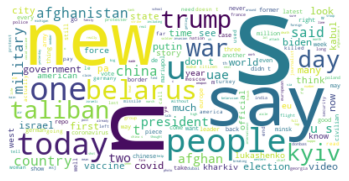

In [67]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

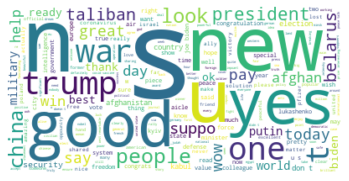

In [68]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

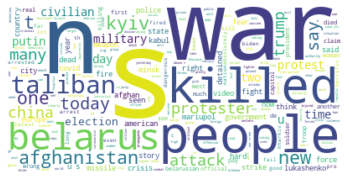

In [69]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [70]:
#retweets distribution over time
fig = px.line(yaroslavtweets , x="time", y= yaroslavtweets ['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [71]:
df=yaroslavtweets  [['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=yaroslavtweets  [['time', 'retweet_count','text Positive Sentiment Score']]
neg =yaroslavtweets  [['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
345,2022-03-31 18:04:58+00:00,2617,0.196,0.080
346,2022-03-31 17:43:29+00:00,100,0.000,0.000
347,2022-03-31 16:34:15+00:00,36,0.000,0.000
348,2022-03-31 16:31:19+00:00,13,0.000,0.000
349,2022-03-31 16:27:54+00:00,416,0.000,0.000
...,...,...,...,...
713,2022-03-01 17:23:49+00:00,0,0.000,0.383
714,2022-03-01 17:10:51+00:00,0,0.114,0.192
715,2022-03-01 15:41:21+00:00,309,0.000,0.216
716,2022-03-01 05:58:44+00:00,41,0.000,0.157


In [72]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [73]:

yaroslavtweets["is_viral"] = yaroslavtweets.retweet_count.apply(
    lambda row: 1 if row >= yaroslavtweets.retweet_count.mean()  else 0)

print(yaroslavtweets.is_viral.value_counts())

0    2880
1     357
Name: is_viral, dtype: int64


In [74]:
yaroslavtweets['tweet_length'] = yaroslavtweets.apply(lambda tweet: len(tweet['text']), axis=1)
yaroslavtweets["followers_count"] = yaroslavtweets.apply(lambda tweet: tweet["followers_count"], axis=1)
yaroslavtweets["friends_count"] = yaroslavtweets.apply(lambda tweet: tweet["following"], axis=1)

yaroslavtweets["hashtag_count"] = yaroslavtweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
yaroslavtweets["link_count"] = yaroslavtweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
yaroslavtweets["word_count"] = yaroslavtweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

yaroslavtweets["avg_length_of_words"] = yaroslavtweets.text.apply(find_avg_word_length)

In [75]:


labels = yaroslavtweets[["is_viral"]]
features = yaroslavtweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = yaroslavtweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = yaroslavtweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                       103
followers_count                  86743
friends_count                     3503
text Positive Sentiment Score      0.0
text Negative Sentiment Score      0.0
Name: 0, dtype: object
[-0.30859547  0.          0.         -0.5717148  -0.66005175]


In [76]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [77]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9089506172839507

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

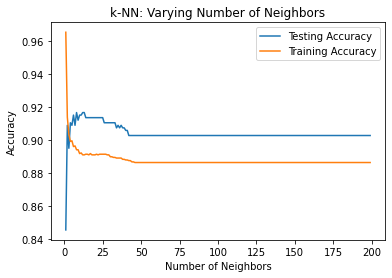

In [78]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [79]:
#lets find best_k

best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

8
0.9166666666666666


In [82]:
yaroslavtweets.to_csv('yaroslavtweets')